# **Analysis of Technical Indicators**
> By Srishti Singh

**MACD - Moving Average Convergence Divergence**

In [1]:
# Importing the libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy
import yfinance as yfin
yfin.pdr_override() # This is crucial to avioid list constraints
import math
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Set the end_date to the cureent date and the start_date to one year prior
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

# This function gets all the data for a ticker
def get_data(ticker):
    asset = pdr.get_data_yahoo(ticker, start = start_date, end = end_date)
    asset.reset_index(inplace = True) # To make the date a column
    return asset

tsla = get_data('TSLA')
tsla

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,254.500000,255.160004,241.009995,242.399994,242.399994,98363500
1,2022-10-04,250.520004,257.500000,242.009995,249.440002,249.440002,109578500
2,2022-10-05,245.009995,246.669998,233.270004,240.809998,240.809998,86982700
3,2022-10-06,239.440002,244.580002,235.350006,238.130005,238.130005,69298400
4,2022-10-07,233.940002,234.570007,222.020004,223.070007,223.070007,83916800
...,...,...,...,...,...,...,...
246,2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
247,2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200
248,2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900
249,2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200


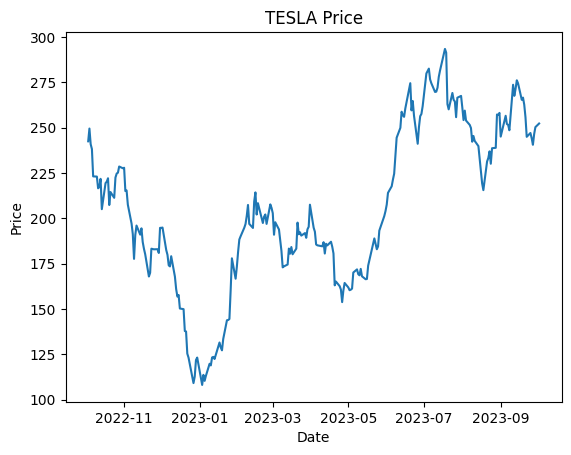

In [3]:
plt.plot(tsla['Date'], tsla['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TESLA Price')
plt.show()

In [4]:
# This is to calculate the 12 and 26 period exponential weighted mean (ewm) average
k = tsla['Adj Close'].ewm(span = 12, adjust = False).mean()
d = tsla['Adj Close'].ewm(span = 26, adjust = False).mean()

# MACD would be the difference of these 2
macd_tsla = k - d

# The signal line is also plotted using a 9 day period
macd_tsla_signal = macd_tsla.ewm(span = 9, adjust = False).mean()

# To calculate between the MACD and signal for the convergence/divergence value
macd_diff = macd_tsla - macd_tsla_signal

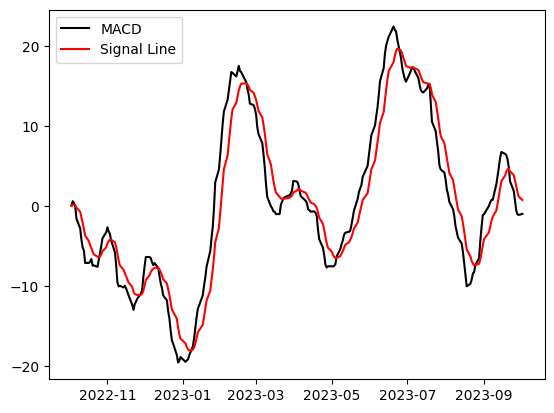

In [5]:
# Plot the data for the MACD and signal line
plt.plot(tsla['Date'], macd_tsla, label = 'MACD', color = 'black')
plt.plot(tsla['Date'], macd_tsla_signal, label = 'Signal Line', color = 'red')
plt.legend(loc='upper left')
plt.show()

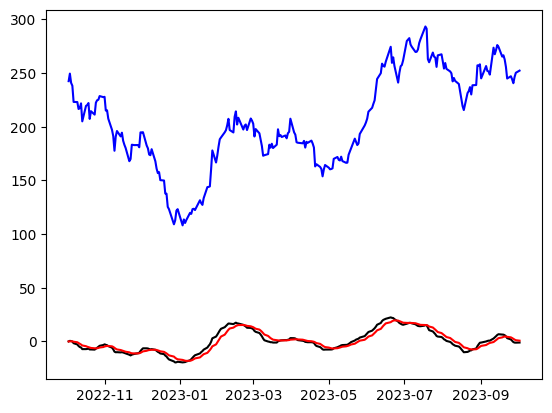

In [6]:
plt.plot(tsla['Date'], tsla['Adj Close'], label='AMD', color = 'blue')
plt.plot(tsla['Date'], macd_tsla, label = 'MACD', color = 'black')
plt.plot(tsla['Date'], macd_tsla_signal, label = 'Signal Line', color = 'red')
plt.show()